In [36]:
image_grid = [
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0,1],
    [0, 0, 0, 0, 1, 0,1, 0],
    [0, 0, 0, 1, 0,1, 0, 0]
]

In [37]:
bg_color = 1
fg_color = 0

In [38]:
rows = len(image_grid)
cols = len(image_grid[0])

In [39]:
class Coordinates:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"({self.x}, {self.y})"

In [40]:
def get_neighbouring_points(image, r, c):
    stack = [Coordinates(r, c)]
    points = []

    while stack:
        coord = stack.pop()
        x, y = coord.x, coord.y

        # Skip if this pixel is already visited or bg
        if image[x][y] != fg_color:
            continue

        # Mark the pixel as visited by changing it to 2
        image[x][y] = 2
        points.append(coord)

        # Check all neighbors (3x3 filter)
        for i in range(-1, 2):
            for j in range(-1, 2):
                nx, ny = x + i, y + j
                # checking the boundary coordinates
                if 0 <= nx < len(image) and 0 <= ny < len(image[0]):
                    # If the neighbor is part of the foreground, add to the stack
                    if image[nx][ny] == fg_color:
                        stack.append(Coordinates(nx, ny))
    return points

In [41]:
def convert_to_sub_image(old_points):
    # max and min cordinate vals
    min_x = min(point.x for point in old_points)
    max_x = max(point.x for point in old_points)
    min_y = min(point.y for point in old_points)
    max_y = max(point.y for point in old_points)

    new_width = max_y - min_y + 1
    new_height = max_x - min_x + 1

    new_image = [[bg_color] * new_width for _ in range(new_height)]

    for point in old_points:
        new_x = point.x - min_x
        new_y = point.y - min_y
        new_image[new_x][new_y] = fg_color

    return new_image

In [42]:
def print_image_in_2d(image):
    for row in image:
        print("[" + " ".join(str(col) for col in row) + "]")

In [43]:
def get_sub_images(image):
    rows = len(image)
    cols = len(image[0])

    sub_images = []

    for r in range(rows):
        for c in range(cols):
            if image[r][c] == fg_color:
                obj_points = get_neighbouring_points(image, r, c)
                sub_image = convert_to_sub_image(obj_points)
                sub_images.append(sub_image)

    for i, sub_image in enumerate(sub_images):
        print("SUB IMAGE #", i + 1)
        print_image_in_2d(sub_image)

In [44]:
get_sub_images(image_grid)

SUB IMAGE # 1
[1 1 0 1 0 0 0 0]
[0 0 0 0 1 0 1 0]
[1 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0]
[0 0 0 0 0 1 0 1]
[0 0 0 0 1 0 1 0]
[0 0 0 1 0 1 0 0]


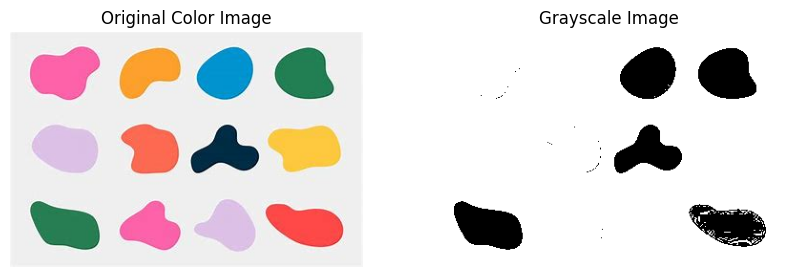

SUB IMAGE # 1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_images(original, grayscale):
    plt.figure(figsize=(10, 5))

    # iamge 1
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Color Image")
    plt.axis('off')

    # image 2
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.show()


def load_and_convert_image(image_path):
    original_image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(gray_image, 127, 1, cv2.THRESH_BINARY)

    display_images(original_image, binary_image)
    return binary_image

image_path = '/content/shapes.jpg'

binary_image = load_and_convert_image(image_path)

get_sub_images(binary_image)


In [ ]:
# TODO: show sub-image instead of numbers